 9. We will now consider the Boston housing data set, from the ISLP
 library.

In [1]:
!pip install ISLP

In [8]:
from ISLP import load_data
import pandas as pd
boston = load_data('Boston')

 (a) Based on this data set, provide an estimate for the population
 mean of medv. Call this estimate ˆ µ.

In [9]:
# Calculate the mean of 'medv' column
medv_mean = boston['medv'].mean()

# Display the result
print("Estimated population mean of medv (μ̂):", medv_mean)

Estimated population mean of medv (μ̂): 22.532806324110677


 (b) Provide an estimate of the standard error of ˆ µ. Interpret this
 result.
 
 Hint: We can compute the standard error of the sample mean by
 dividing the sample standard deviation by the square root of the
 number of observations.

In [10]:
# Calculate the sample standard deviation of 'medv'
medv_std_dev = boston['medv'].std()

# Calculate the number of observations
n = len(boston['medv'])

# Calculate the standard error of the mean
standard_error = medv_std_dev / (n ** 0.5)

# Display the result
print("Standard error of the mean (SE):", standard_error)


Standard error of the mean (SE): 0.40886114749753505


(c) Now estimate the standard error of ˆ µ using the bootstrap. How
 does this compare to your answer from (b)?

In [11]:
import numpy as np

# Set the number of bootstrap samples
n_bootstrap_samples = 1000

# Array to store bootstrap means
bootstrap_means = []

# Perform bootstrap sampling
for _ in range(n_bootstrap_samples):
    # Resample the data with replacement
    bootstrap_sample = boston['medv'].sample(n=len(boston['medv']), replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_mean = bootstrap_sample.mean()
    # Store the mean
    bootstrap_means.append(bootstrap_mean)

# Calculate the standard deviation of the bootstrap means as the bootstrap standard error
bootstrap_standard_error = np.std(bootstrap_means)

# Display the result
print("Bootstrap standard error of the mean (SE):", bootstrap_standard_error)


Bootstrap standard error of the mean (SE): 0.4075521507012483


結果與實際標準差接近

 (d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results
 obtained by using Boston['medv'].std() and the two standard
 error rule (3.9).

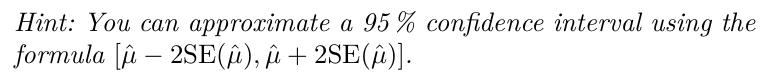

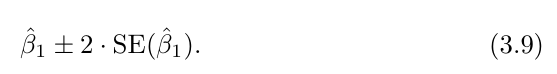

In [13]:
# Calculate the confidence interval
confidence_interval_lower = medv_mean - 2 * bootstrap_standard_error
confidence_interval_upper = medv_mean + 2 * bootstrap_standard_error

# Display the result
print("95% Confidence Interval for the mean of medv:", (confidence_interval_lower, confidence_interval_upper))

# Confidence interval using theoretical standard error
confidence_interval_lower_theoretical = medv_mean - 2 * standard_error
confidence_interval_upper_theoretical = medv_mean + 2 * standard_error

# Display the results
print("95% Confidence Interval for the mean of medv (Theoretical SE):",
      (confidence_interval_lower_theoretical, confidence_interval_upper_theoretical))



95% Confidence Interval for the mean of medv: (21.71770202270818, 23.347910625513173)
95% Confidence Interval for the mean of medv (Theoretical SE): (21.715084029115605, 23.35052861910575)


兩個區間相似，可以合理地認為任一方法均提供了 95% 信賴區間的良好估計



 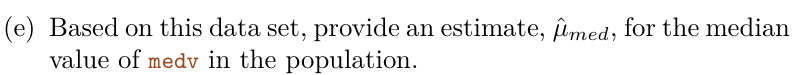

In [14]:
# 計算 'medv' 的中位數
medv_median = boston['medv'].median()

# 顯示結果
print("估計的 medv 中位數 (μ̂_med):", medv_median)


估計的 medv 中位數 (μ̂_med): 21.2



 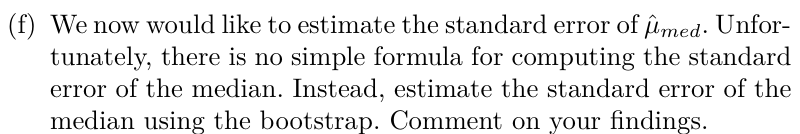

In [15]:
# 設定引導樣本的次數
n_bootstrap_samples = 1000

# 用於儲存引導樣本的中位數
bootstrap_medians = []

# 進行引導抽樣
for _ in range(n_bootstrap_samples):
    # 有放回地從 'medv' 中抽樣
    bootstrap_sample = boston['medv'].sample(n=len(boston['medv']), replace=True)
    # 計算引導樣本的中位數
    bootstrap_median = bootstrap_sample.median()
    # 儲存中位數
    bootstrap_medians.append(bootstrap_median)

# 計算引導法標準誤（中位數的標準差）
bootstrap_standard_error_median = np.std(bootstrap_medians)

# 顯示結果
print("medv 中位數的引導法標準誤 (SE):", bootstrap_standard_error_median)


medv 中位數的引導法標準誤 (SE): 0.37963402113087774


中位數的計算對極值不敏感，因此它比均值更穩健


 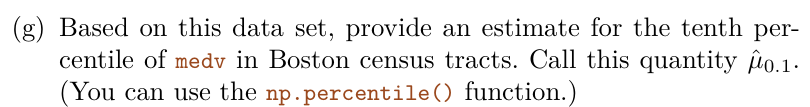

In [16]:
# 計算 'medv' 的第 10 百分位數
tenth_percentile = np.percentile(boston['medv'], 10)

# 顯示結果
print("medv 的第 10 百分位數 (μ̂_0.1):", tenth_percentile)


medv 的第 10 百分位數 (μ̂_0.1): 12.75




 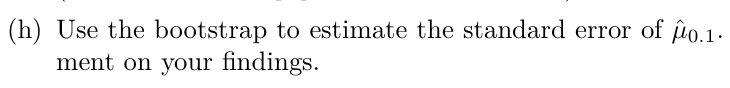

In [17]:
# 設定引導樣本的次數
n_bootstrap_samples = 1000

# 用於儲存引導樣本的第 10 百分位數
bootstrap_percentiles = []

# 進行引導抽樣
for _ in range(n_bootstrap_samples):
    # 有放回地從 'medv' 中抽樣
    bootstrap_sample = boston['medv'].sample(n=len(boston['medv']), replace=True)
    # 計算引導樣本的第 10 百分位數
    bootstrap_percentile = np.percentile(bootstrap_sample, 10)
    # 儲存百分位數
    bootstrap_percentiles.append(bootstrap_percentile)

# 計算引導法標準誤（第 10 百分位數的標準差）
bootstrap_standard_error_percentile = np.std(bootstrap_percentiles)

# 顯示結果
print("medv 第 10 百分位數的引導法標準誤 (SE):", bootstrap_standard_error_percentile)


medv 第 10 百分位數的引導法標準誤 (SE): 0.49988868510899503


百分位數是一個穩健的統計量，它比均值對於極值的敏感度更低